# Linear regression start
Multiple datasets have been used, but this dataset is one where every non date variable has been normalised between 0 and 1. 



In [ ]:
#importing pandas
import pandas as pd

#importing numpy
import numpy as np

#importing matplotlib
import matplotlib.pyplot as plt
test_results = {}


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [NC]')
  plt.legend()
  plt.grid(True)

The below codes are for different datasets that were normalised and standardised. The first database all feature variables and the number of collisions are normalised, the second database all feature variables and the number of collisions are standardised, the third database only the number of collisions has been standardised. 

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/agronemic/19004547DAOTW/main/New_york_collisions_version4normalised.csv', index_col=4, )
df

,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
collision_date,,,,,,,,,,,,,,,,
2018-09-23,7,2018,9,23,0.667491,0.005686,0.003818,1.000000,0.120879,0.121429,0.000000,0.732927,0.734667,0.000,0,0.341625
2018-12-20,4,2018,12,20,0.405439,0.004107,0.003462,0.959184,0.230769,0.166667,0.000000,0.365854,0.306667,0.000,0,0.890547
2013-11-05,2,2013,11,5,0.466007,0.003708,0.005416,1.000000,0.170330,0.166667,0.000000,0.390244,0.532000,0.000,0,0.399668
2012-07-11,3,2012,7,11,0.881335,0.006865,0.003429,1.000000,0.060440,0.166667,0.000000,0.804878,0.892000,0.000,0,0.490879
2012-07-12,4,2012,7,12,0.885043,0.006686,0.003629,1.000000,0.082418,0.166667,0.000000,0.853659,0.786667,0.000,0,0.510779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,1,2017,12,25,0.436341,0.004197,0.002231,0.785714,0.873626,1.000000,0.962775,0.390244,0.494667,0.002,0,0.106136
2012-11-07,3,2012,11,7,0.386897,0.003378,0.002841,0.724490,0.510989,1.000000,0.945854,0.368293,0.438667,0.000,1,0.744610
2014-11-13,4,2014,11,13,0.543881,0.004777,0.002941,0.857143,0.417582,0.000000,0.000000,0.609756,0.626667,0.000,1,0.708126


In [ ]:
# create data frame from csv file hosted on github
df = pd.read_csv('https://raw.githubusercontent.com/agronemic/19004547DAOTW/main/New_york_collisions_version4Standardised.csv', index_col=4, )
df

,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
collision_date,,,,,,,,,,,,,,,,
2018-09-23,7,2018,9,23,0.497229,0.009235,-0.140128,0.757097,-1.861262,-2.219024,-1.195897,1.200219,0.551728,-0.137600,-0.589154,-0.876381
2018-12-20,4,2018,12,20,-0.980724,-0.076027,-0.142635,0.571868,-1.310142,-1.847685,-1.195897,-0.874690,-1.614896,-0.137600,-0.589154,2.019455
2013-11-05,2,2013,11,5,-0.639122,-0.097613,-0.128849,0.757097,-1.613258,-1.847685,-1.195897,-0.736823,-0.474212,-0.137600,-0.589154,-0.570175
2012-07-11,3,2012,7,11,1.703295,0.072912,-0.142870,0.757097,-2.164379,-1.847685,-1.195897,1.606929,1.348182,-0.137600,-0.589154,-0.088994
2012-07-12,4,2012,7,12,1.724209,0.063199,-0.141460,0.757097,-2.054154,-1.847685,-1.195897,1.882665,0.814963,-0.137600,-0.589154,0.015991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,1,2017,12,25,-0.806437,-0.071170,-0.151329,-0.215352,1.913912,4.992758,2.960267,-0.736823,-0.663201,-0.121886,-0.589154,-2.118704
2012-11-07,3,2012,11,7,-1.085296,-0.115421,-0.147021,-0.493194,0.095215,4.992758,2.887224,-0.860904,-0.946685,-0.137600,1.696765,1.249565
2014-11-13,4,2014,11,13,-0.199918,-0.039872,-0.146316,0.108798,-0.373237,-3.215774,-1.195897,0.503987,0.005010,-0.137600,1.696765,1.057093


# Main predictor standardised only

This dataset has only the number of collisions standardised, im unsure of how much of an afffect this will have on accuracy (if any). The different range of numbers between standardised and normalised versions also makes it difficult to tell how much of an increase or decrease the difference in mean standard error is to performance. 

Day linear regressor mean error: 0.785354733467102

max, Temp, min, Windspeed, prpc linear regressor mean error: 0.7933220863342285

All weather variables linear regressor main error: 0.8252803683280945

day, month, max, temp, min, wdsp, prcp linear regressor main error: 0.8415966033935547

max, Temp, Windspeed, prpc DNN mean error: 0.8093813061714172

day, mo, max, temp, min, wdsp, prcp DNN mean error : 0.6556625962257385

DNN all weather variables mean error: 0.8211637735366821


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/agronemic/19004547DAOTW/main/New_york_collisions_version4StandardisedNCONLY.csv', index_col=4, )
df

,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
collision_date,,,,,,,,,,,,,,,,
2018-09-23,7,2018,9,23,59.8,50.2,1023.4,10.0,3.0,5.1,0.0,78.1,53.1,0.0,0,-0.876381
2018-12-20,4,2018,12,20,38.6,34.4,1020.2,9.6,5.0,7.0,0.0,48.0,21.0,0.0,0,2.019455
2013-11-05,2,2013,11,5,43.5,30.4,1037.8,10.0,3.9,7.0,0.0,50.0,37.9,0.0,0,-0.570175
2012-07-11,3,2012,7,11,77.1,62.0,1019.9,10.0,1.9,7.0,0.0,84.0,64.9,0.0,0,-0.088994
2012-07-12,4,2012,7,12,77.4,60.2,1021.7,10.0,2.3,7.0,0.0,88.0,57.0,0.0,0,0.015991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,1,2017,12,25,41.1,35.3,1009.1,7.9,16.7,42.0,56.9,50.0,35.1,0.2,0,-2.118704
2012-11-07,3,2012,11,7,37.1,27.1,1014.6,7.3,10.1,42.0,55.9,48.2,30.9,0.0,1,1.249565
2014-11-13,4,2014,11,13,49.8,41.1,1015.5,8.6,8.4,0.0,0.0,68.0,45.0,0.0,1,1.057093


In [ ]:
df.describe()

,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
count,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2.910000e+03
mean,3.993471,2016.015464,6.727148,15.676976,52.667663,48.488591,1202.305911,8.365052,9.754467,16.453918,16.372440,60.688832,44.925773,1.751320,0.257732,-4.199771e-16
std,1.998528,2.395445,3.412782,8.824603,14.344163,185.310055,1276.729268,2.159497,3.628971,5.116627,13.690509,14.506655,14.815674,12.727618,0.437461,1.000000e+00
min,1.000000,2012.000000,1.000000,1.000000,5.800000,-6.700000,989.000000,0.200000,0.800000,0.000000,0.000000,18.000000,-2.000000,0.000000,0.000000,-2.678624e+00
25%,2.000000,2014.000000,4.000000,8.000000,41.425000,32.900000,1012.500000,7.225000,7.000000,13.000000,0.000000,48.900000,33.850000,0.000000,0.000000,-5.701751e-01
50%,4.000000,2016.000000,7.000000,16.000000,53.300000,46.400000,1017.100000,9.400000,9.500000,15.900000,21.000000,61.000000,45.000000,0.000000,0.000000,8.598128e-02
75%,6.000000,2018.000000,10.000000,23.000000,65.300000,59.500000,1022.300000,10.000000,12.300000,20.000000,27.000000,73.000000,57.900000,0.050000,1.000000,6.721476e-01
max,7.000000,2020.000000,12.000000,31.000000,86.700000,9999.900000,9999.900000,10.000000,19.000000,42.000000,59.100000,100.000000,73.000000,99.990000,1.000000,2.596873e+00


**IMPORTANT NOTE**
as can be seen the maximum and minimum of this dataset is 2.5 and -2.6 respectively so keep that in mind when seeing the mean error and compare it to the much larger standardised range of numbers. 

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.11.0


In [ ]:
SCALE_NUM_COLLISIONS = 1.0

This is the initial setup.

# Day and NUM_TRIPS linear regressor

This initial linear regressor is a test run. Although using the day as a predictor might have great accuracy that does not show the effects of the weather on the number of collisions in new york. 

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_input_data_day = [df["day"], df["NUM_COLLISIONS"]] 
# create headers for our new dataframe. These should correlate with the above.
df_input_headers_day = ["day", "NUM_COLLISIONS"] 
# create a final dataframe using our new dataframe and headers. 
df_input_day = pd.concat(df_input_data_day, axis=1, keys=df_input_headers_day) 

In [ ]:
# construct a training set for runnign through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test.
training_set_day = df_input_day.sample(frac=0.8, random_state=0)
test_set_day = df_input_day.drop(training_set_day.index)

In [ ]:
# copy the datasets and remove the output column. We do this using pop.
training_features_day = training_set_day.copy()
test_features_day = test_set_day.copy()

training_labels_day = training_features_day.pop('NUM_COLLISIONS')
test_labels_day = test_features_day.pop('NUM_COLLISIONS')

In [ ]:
#Here I have put a scale factor and divided by it
training_labels_day = training_labels_day/SCALE_NUM_COLLISIONS
test_labels_day = test_labels_day/SCALE_NUM_COLLISIONS

In [ ]:
print(training_features_day)

                day
collision_date     
2016-05-20        5
2017-12-10        7
2018-02-23        5
2017-07-24        1
2014-07-03        4
...             ...
2016-06-10        5
2018-06-30        6
2015-06-30        2
2014-02-18        2
2017-08-22        2

[2328 rows x 1 columns]


In [ ]:
normaliser_day = tf.keras.layers.Normalization(input_shape=[1,], axis=None) # tf.keras.layers.Normalization(axis=-1) 
normaliser_day.adapt(np.array(training_features_day))

In [ ]:
model_0 = tf.keras.Sequential([
    normaliser_day,
    layers.Dense(units=1)
])

In [ ]:
model_0.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split. 

%%time
history = model_0.fit(
    training_features_day,
    training_labels_day,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

CPU times: user 15.4 s, sys: 719 ms, total: 16.1 s
Wall time: 15 s


In [ ]:
# Evaluation
mean_absolute_error_model_0 = model_0.evaluate(
    test_features_day,
    test_labels_day, verbose=0)

In [ ]:
print(mean_absolute_error_model_0)

0.7599870562553406


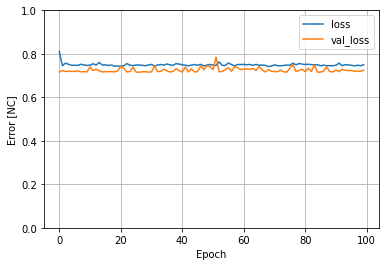

In [ ]:
plot_loss(history)

18/18 [==============================] - 0s 2ms/step


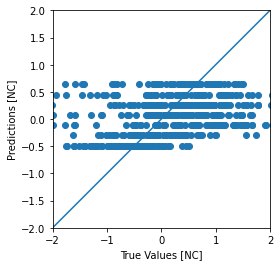

In [ ]:
test_predictions = model_0.predict(test_features_day).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [-2, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

This fit is seemingly very poor. Which is understandable. 

# max, Temp, Windspeed, prpc, NUM_TRIPS


In [ ]:
df_input_data = [df["max"], df["temp"], df["min"], df["wdsp"],df["prcp"], df["NUM_COLLISIONS"]] 
# create headers for our new dataframe. These should correlate with the above.
df_input_headers = ["max", "temp", "min", "wdsp", "prcp", "NUM_COLLISIONS"] 
# create a final dataframe using our new dataframe and headers. 
df_input = pd.concat(df_input_data, axis=1, keys=df_input_headers) 

In [ ]:
training_set = df_input.sample(frac=0.8, random_state=0)
test_set = df_input.drop(training_set.index)

In [ ]:
# copy the datasets and remove the output column. We do this using pop.
training_features = training_set.copy()
test_features = test_set.copy()

training_labels = training_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

In [ ]:
training_labels = training_labels/SCALE_NUM_COLLISIONS
test_labels = test_labels/SCALE_NUM_COLLISIONS

In [ ]:
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

In [ ]:
model_1 = tf.keras.Sequential([
    normaliser,
    layers.Dense(units=1)
])

In [ ]:
# more boiler plate for creating a sequential model, we need an optimiser and loss parameter. Here we are going to be using the mean absolute error MAE
model_1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Here i tried two different epoch values, 100 which gave a mean absolute error of 0.1545267254114151, and 1000, which gave a mean absolute error of 0.20800668001174927, oddly enough reducing the accuracy by quite a bit.

In [ ]:
# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split. 

%%time
history = model_1.fit(
    training_features,
    training_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

CPU times: user 17.4 s, sys: 690 ms, total: 18.1 s
Wall time: 20.4 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.803154,0.730125,95
96,0.797792,0.744370,96
97,0.790797,0.727815,97
98,0.788263,0.764618,98
99,0.786641,0.754085,99


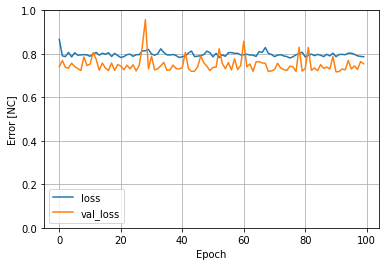

In [ ]:
plot_loss(history)

the loss graph shows no significant progress across epochs.

In [ ]:
def plot_NUM_COLLISIONS(x, y):
  plt.scatter(train_features['NUM_COLLISIONS'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('NUM_COLLISIONS')
  plt.legend()

In [ ]:
#evaluate our model using the test features and labels. 
mean_absolute_error_model_1 = model_1.evaluate(
    test_features,
    test_labels, verbose=0)

In [ ]:
# The mean absolute error of the model can be printed out. It will also vary on each training run due to randomisation.
print(mean_absolute_error_model_1)

0.8160154819488525


In [ ]:
test_results['LM_model_main'] = model_1.evaluate(test_features, test_labels, verbose=0)


In [ ]:
# we create a custom dataframe with 3 values per feature. 
input_1 = pd.DataFrame.from_dict(data = 
				{
            'max' : [0.732927,0.365854,0.390244],
            'temp' : [0.667491, 0.405439, 0.466007],
            'min' : [0.734667,0.306667,0.532000],
            'wdsp' : [0.120879, 0.230769,0.170330],
            'prcp' : [	0,0,0]
        })

In [ ]:
input_1.head()

,max,temp,min,wdsp,prcp
0,0.732927,0.667491,0.734667,0.120879,0
1,0.365854,0.405439,0.306667,0.230769,0
2,0.390244,0.466007,0.532000,0.170330,0


In [ ]:
linear_day_predictions_1 = model_1.predict(input_1[:3])*SCALE_NUM_COLLISIONS # essentially 600000 in this instance would give back realistic numbers based on the TAXI_TRIPS data
print(linear_day_predictions_1)

1/1 [==============================] - 0s 58ms/step
[[-1.2290215]
 [-1.2273537]
 [-1.2320975]]


We have used the first 3 elements in the array to see if it gives an accurate result

The first prediction is off, at 0.341625 when it predicted 0.53431046

the second prediction is massively off, as 0.890547 was the closest possible answer and it gave 0.39628223 

and the third prediction is the closest at 0.399668 when it predicted  0.39625937, which is incredibly close. 

The last prediction with the higher temperature seems to punish the values more.

In [ ]:
input_2 = pd.DataFrame.from_dict(data = 
				{
            'day' : [6,6,6],
            'temp' : [61.8, 31.2, 77.0],
            'wdsp' : [5.0, 3.0, 8.0]
        })

18/18 [==============================] - 0s 1ms/step


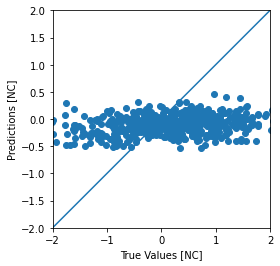

In [ ]:
test_predictions = model_1.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [-2, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

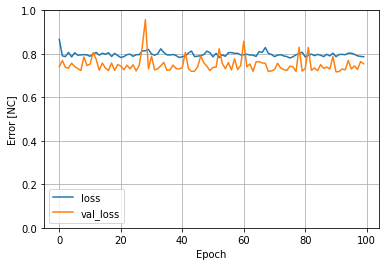

In [ ]:
plot_loss(history)

# max, Temp,min, Windspeed, prpc, day, month, and NUM_TRIPS


Although this linear shouldnt be a part of the assignment as its studying the effects of weather, it is important to see how much the day and month can impact the accuracy of the linear regressor and if the new york emergency services might be better off being on high alert on certain days and months instead of the weather. 

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_input_data = [df["mo"],df["da"],df["max"], df["temp"], df["min"], df["wdsp"],df["prcp"], df["NUM_COLLISIONS"]] 
# create headers for our new dataframe. These should correlate with the above.
df_input_headers = ["mo", "da", "max", "temp", "min", "wdsp", "prcp", "NUM_COLLISIONS"] 
# create a final dataframe using our new dataframe and headers. 
df_input = pd.concat(df_input_data, axis=1, keys=df_input_headers) 

In [ ]:
# construct a training set for runnign through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test.
training_set = df_input.sample(frac=0.8, random_state=0)
test_set = df_input.drop(training_set.index)

In [ ]:
# copy the datasets and remove the output column. We do this using pop.
training_features = training_set.copy()
test_features = test_set.copy()

training_labels = training_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

In [ ]:
# Here I have put in a scale factor and divided by it 
training_labels = training_labels/SCALE_NUM_COLLISIONS
test_labels = test_labels/SCALE_NUM_COLLISIONS

In [ ]:
# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

In [ ]:
model_1 = tf.keras.Sequential([
    normaliser,
    layers.Dense(units=1)
])

In [ ]:
model_1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Here i tried two different epoch values, 100 which gave a mean absolute error of 0.1545267254114151, and 1000, which gave a mean absolute error of 0.20800668001174927, oddly enough reducing the accuracy by quite a bit.

In [ ]:
# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split. 

%%time
history = model_1.fit(
    training_features,
    training_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

CPU times: user 18.5 s, sys: 727 ms, total: 19.2 s
Wall time: 41.7 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.795138,0.786916,95
96,0.797694,0.721787,96
97,0.813056,0.749917,97
98,0.789455,0.728388,98
99,0.792639,0.829386,99


In [ ]:
# Now, we will evaluate our model using the test features and labels. 
mean_absolute_error_model_1 = model_1.evaluate(
    test_features,
    test_labels, verbose=0)

In [ ]:
print(mean_absolute_error_model_1)

0.836503267288208


18/18 [==============================] - 0s 3ms/step


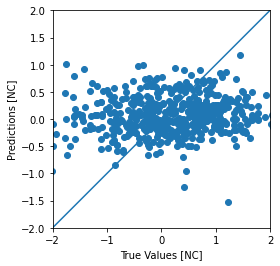

In [ ]:
test_predictions = model_1.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [-2, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_results['LM_model_moday'] = model_1.evaluate(test_features, test_labels, verbose=0)


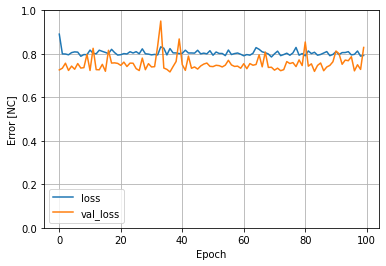

In [ ]:
plot_loss(history)

# All weather related feature variables linear regressor

This is to see how much of an effect on preformance the other variables might have for linear regression. 

In [ ]:
df_input_data = [df["max"], df["temp"], df["min"], df["wdsp"],df["prcp"],df["slp"], df["visib"], df["gust"],df["fog"], df["mxpsd"],  df["NUM_COLLISIONS"]] 
# create headers for our new dataframe. These should correlate with the above.
df_input_headers = ["max", "temp", "min", "wdsp","prcp","slp", "visib", "gust", "fog", "mxpsd", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers. 
df_input = pd.concat(df_input_data, axis=1, keys=df_input_headers) 

In [ ]:
# construct a training set for runnign through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test.
training_set = df_input.sample(frac=0.8, random_state=0)
test_set = df_input.drop(training_set.index)

In [ ]:
# copy the datasets and remove the output column. We do this using pop.
training_features = training_set.copy()
test_features = test_set.copy()

training_labels = training_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

In [ ]:
training_labels = training_labels/SCALE_NUM_COLLISIONS
test_labels = test_labels/SCALE_NUM_COLLISIONS

In [ ]:
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

In [ ]:
model_1 = tf.keras.Sequential([
    normaliser,
    layers.Dense(units=1)
])

In [ ]:
model_1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Here i tried two different epoch values, 100 which gave a mean absolute error of 0.1545267254114151, and 1000, which gave a mean absolute error of 0.20800668001174927, oddly enough reducing the accuracy by quite a bit.

In [ ]:

%%time
history = model_1.fit(
    training_features,
    training_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

CPU times: user 15.4 s, sys: 683 ms, total: 16 s
Wall time: 14.8 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.805849,0.755821,95
96,0.835019,0.749341,96
97,0.807951,0.735484,97
98,0.822720,0.743148,98
99,0.814438,0.733076,99


In [ ]:
# Now, we will evaluate our model using the test features and labels. 
mean_absolute_error_model_1 = model_1.evaluate(
    test_features,
    test_labels, verbose=0)

In [ ]:
print(mean_absolute_error_model_1)

0.810304582118988


In [ ]:
test_results['LM_model_all'] = model_1.evaluate(test_features, test_labels, verbose=0)


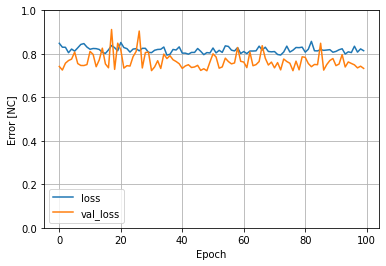

In [ ]:
plot_loss(history)

Interestingly enough there are no signs of overtraining despite using a large amount of variables. This is most likely due to the low overall amount of variables and the decently high amount of entries. 

18/18 [==============================] - 0s 1ms/step


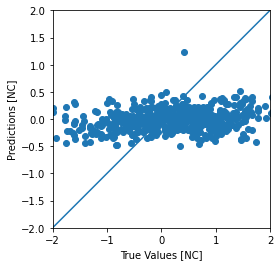

In [ ]:
test_predictions = model_1.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [-2, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

However the fit is clearly very poor

# Tensorflow

In [ ]:
df[:5]


,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
collision_date,,,,,,,,,,,,,,,,
2018-09-23,7,2018,9,23,59.8,50.2,1023.4,10.0,3.0,5.1,0.0,78.1,53.1,0.0,0,-0.876381
2018-12-20,4,2018,12,20,38.6,34.4,1020.2,9.6,5.0,7.0,0.0,48.0,21.0,0.0,0,2.019455
2013-11-05,2,2013,11,5,43.5,30.4,1037.8,10.0,3.9,7.0,0.0,50.0,37.9,0.0,0,-0.570175
2012-07-11,3,2012,7,11,77.1,62.0,1019.9,10.0,1.9,7.0,0.0,84.0,64.9,0.0,0,-0.088994
2012-07-12,4,2012,7,12,77.4,60.2,1021.7,10.0,2.3,7.0,0.0,88.0,57.0,0.0,0,0.015991


In [ ]:
dnn_input_data = [df["max"], df["temp"],df["min"], df["wdsp"],df["prcp"],df["NUM_COLLISIONS"]]
headers = ["max","temp", "min", "wdsp","prcp","NUM_COLLISIONS"]
df_dnn_input = pd.concat(dnn_input_data, axis=1, keys=headers)
df_dnn_input.head()

,max,temp,min,wdsp,prcp,NUM_COLLISIONS
collision_date,,,,,,
2018-09-23,78.1,59.8,53.1,3.0,0.0,-0.876381
2018-12-20,48.0,38.6,21.0,5.0,0.0,2.019455
2013-11-05,50.0,43.5,37.9,3.9,0.0,-0.570175
2012-07-11,84.0,77.1,64.9,1.9,0.0,-0.088994
2012-07-12,88.0,77.4,57.0,2.3,0.0,0.015991


In [ ]:
training_dataset = df_dnn_input.sample(frac=0.8, random_state=0)
test_dataset = df_dnn_input.drop(training_dataset.index)

In [ ]:
training_features = training_dataset.copy()
test_features = test_dataset.copy()

training_labels = training_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

In [ ]:
training_labels = training_labels/SCALE_NUM_COLLISIONS
test_labels = test_labels/SCALE_NUM_COLLISIONS

In [ ]:
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

In [ ]:
dnn_model_1 = keras.Sequential([
      normaliser,
      layers.Dense(48, activation='relu'),
      layers.Dense(48, activation='relu'),
      layers.Dense(1)
  ])

dnn_model_1.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
%%time
history = dnn_model_1.fit(
    training_features,
    training_labels,
    validation_split=0.2,
    verbose=0, 
    epochs=100)

CPU times: user 17.1 s, sys: 744 ms, total: 17.9 s
Wall time: 21.3 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.732200,0.744012,95
96,0.732793,0.724865,96
97,0.733420,0.725677,97
98,0.734640,0.731801,98
99,0.735273,0.729220,99


In [ ]:
dnn_model_1_results = dnn_model_1.evaluate(test_features, test_labels, verbose=0)
print(dnn_model_1_results)

0.8039378523826599


In [ ]:
dnn_model_1_results

0.8039378523826599

In [ ]:
test_results['dnn_model_1'] = dnn_model_1.evaluate(test_features, test_labels, verbose=0)


In [ ]:
input_1 = pd.DataFrame.from_dict(data = 
				{
            'max' : [0.732927,0.365854,0.390244],
            'temp' : [0.667491, 0.405439, 0.466007],
            'min' : [0.734667,0.306667,0.532000],
            'wdsp' : [0.120879, 0.230769,0.170330],
            'prcp' : [	0,0,0]
        })


In [ ]:
linear_day_predictions = dnn_model_1.predict(input_1[:3])*SCALE_NUM_COLLISIONS
linear_day_predictions 

1/1 [==============================] - 0s 73ms/step


array([[-1.2883197],
       [-1.2626514],
       [-1.2781824]], dtype=float32)

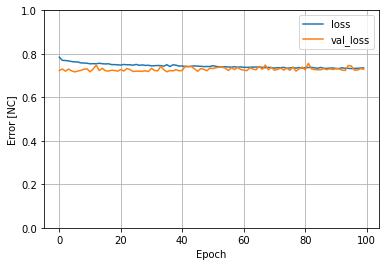

In [ ]:
plot_loss(history)

18/18 [==============================] - 0s 2ms/step


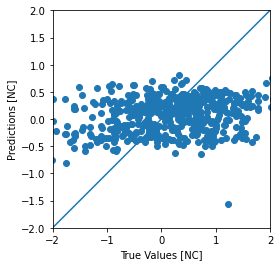

In [ ]:
test_predictions = dnn_model_1.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [-2, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

As can be seen this does badly at predicting the first 3 entries results as the number of collisions for the first three entries were 0.341625, 0.890547, and 0.399668 respectively. though it does predict a higher rate of collisions at for lower tempatures and higher windspeeds.  


Considerations for Assignment. I would likely use another method to either standardise or normalise num_trips. And perhaps not bother and scale them in here with SCALE_NUM_TRIPS with a generally large number.

Obviously, you will likely want to have a number of variations but there is no reason you can't use most of the data given. Remember, the DNN is trying to solve a complex relationship, not a linear one. 

Other things to consider when doing this would be to take validation. Of course, in the assignment you will have a much larger range of data i.e. from some date x to y.

This will give you more data. Taking real validation data that hasn't been shown to the model will give real results for you to check against rather than what I have done here (which is just for information).

# Tensorflow including month and day

In [ ]:
# make sure we have our data by printing it out
df[:5]

,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
collision_date,,,,,,,,,,,,,,,,
2018-09-23,7,2018,9,23,59.8,50.2,1023.4,10.0,3.0,5.1,0.0,78.1,53.1,0.0,0,-0.876381
2018-12-20,4,2018,12,20,38.6,34.4,1020.2,9.6,5.0,7.0,0.0,48.0,21.0,0.0,0,2.019455
2013-11-05,2,2013,11,5,43.5,30.4,1037.8,10.0,3.9,7.0,0.0,50.0,37.9,0.0,0,-0.570175
2012-07-11,3,2012,7,11,77.1,62.0,1019.9,10.0,1.9,7.0,0.0,84.0,64.9,0.0,0,-0.088994
2012-07-12,4,2012,7,12,77.4,60.2,1021.7,10.0,2.3,7.0,0.0,88.0,57.0,0.0,0,0.015991


In [ ]:
dnn_input_data = [df["mo"],df["day"],df["max"], df["temp"],df["min"], df["wdsp"],df["prcp"],df["NUM_COLLISIONS"]]
headers = ["mo","day","max","temp", "min", "wdsp","prcp","NUM_COLLISIONS"]
df_dnn_input = pd.concat(dnn_input_data, axis=1, keys=headers)
df_dnn_input.head()

,mo,day,max,temp,min,wdsp,prcp,NUM_COLLISIONS
collision_date,,,,,,,,
2018-09-23,9,7,78.1,59.8,53.1,3.0,0.0,-0.876381
2018-12-20,12,4,48.0,38.6,21.0,5.0,0.0,2.019455
2013-11-05,11,2,50.0,43.5,37.9,3.9,0.0,-0.570175
2012-07-11,7,3,84.0,77.1,64.9,1.9,0.0,-0.088994
2012-07-12,7,4,88.0,77.4,57.0,2.3,0.0,0.015991


In [ ]:
training_dataset = df_dnn_input.sample(frac=0.8, random_state=0)
test_dataset = df_dnn_input.drop(training_dataset.index)

In [ ]:
training_features = training_dataset.copy()
test_features = test_dataset.copy()

training_labels = training_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

In [ ]:
training_labels = training_labels/SCALE_NUM_COLLISIONS
test_labels = test_labels/SCALE_NUM_COLLISIONS

In [ ]:
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

In [ ]:
dnn_model_moday = keras.Sequential([
      normaliser,
      layers.Dense(48, activation='relu'),
      layers.Dense(48, activation='relu'),
      layers.Dense(1)
  ])

dnn_model_moday.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
%%time
history = dnn_model_moday.fit(
    training_features,
    training_labels,
    validation_split=0.2,
    verbose=0, 
    epochs=100)

CPU times: user 19 s, sys: 717 ms, total: 19.7 s
Wall time: 21.7 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.569842,0.608259,95
96,0.564632,0.602118,96
97,0.570022,0.608424,97
98,0.566909,0.599446,98
99,0.563109,0.608122,99


In [ ]:
dnn_model_1_results = dnn_model_moday.evaluate(test_features, test_labels, verbose=0)
print(dnn_model_1_results)

0.6585946679115295


In [ ]:
dnn_model_1_results

0.6585946679115295

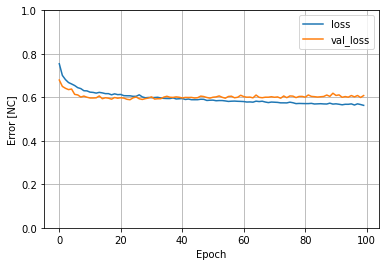

In [ ]:
plot_loss(history)

This shows that most of the progress was done after the first 20 epochs, and the more the algorithm is trained the higher the risk of overfitting. 
However there is still progress being made as the epochs progress. 

18/18 [==============================] - 0s 2ms/step


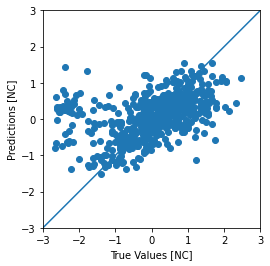

In [ ]:
test_predictions = dnn_model_moday.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [-3, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_results['dnn_model_moday'] = dnn_model_moday.evaluate(test_features, test_labels, verbose=0)


This graph shows that the fit is very good, and vastly outperforms all other regressors and DNNs. The problem with this graph is that the month and day dont really correspond to the weather and it might be off topic to use the month and day for a DNN designed to gauge the impact of weather variables on the number of collisions in new york. However the day and month is always easily accessible information and is the most accurate predictor so far so it might be of great help to the new york city emergency services as they now have information on which days and months are the most dangerous as well.


# Tensorflow including all weather variables

The first iteration of this used 100 epochs, but hte plot loss graph showed that as the loss decreased consistently (the training datas loss) the cross validation loss (val_loss) actually increased, showing signs of overtraining. 
Of course using many variables increases the chances of overtraining greatly, so therefore this DNN will not be picked as the final model due to its overtraining. 

In [ ]:
# needed to create the data frame
import pandas as pd

# needed to help with speedy maths based calculations
import numpy as np

In [ ]:
# make sure we have our data by printing it out
df[:5]
# df #all

,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
collision_date,,,,,,,,,,,,,,,,
2018-09-23,7,2018,9,23,59.8,50.2,1023.4,10.0,3.0,5.1,0.0,78.1,53.1,0.0,0,-0.876381
2018-12-20,4,2018,12,20,38.6,34.4,1020.2,9.6,5.0,7.0,0.0,48.0,21.0,0.0,0,2.019455
2013-11-05,2,2013,11,5,43.5,30.4,1037.8,10.0,3.9,7.0,0.0,50.0,37.9,0.0,0,-0.570175
2012-07-11,3,2012,7,11,77.1,62.0,1019.9,10.0,1.9,7.0,0.0,84.0,64.9,0.0,0,-0.088994
2012-07-12,4,2012,7,12,77.4,60.2,1021.7,10.0,2.3,7.0,0.0,88.0,57.0,0.0,0,0.015991


In [ ]:
dnn_input_data = [df["max"], df["temp"], df["min"], df["wdsp"],df["prcp"],df["slp"], df["visib"], df["gust"],df["fog"], df["mxpsd"],  df["NUM_COLLISIONS"]] 
headers = ["max", "temp", "min", "wdsp","prcp","slp", "visib", "gust", "fog", "mxpsd", "NUM_COLLISIONS"]
df_dnn_input = pd.concat(dnn_input_data, axis=1, keys=headers)
df_dnn_input.head()

,max,temp,min,wdsp,prcp,slp,visib,gust,fog,mxpsd,NUM_COLLISIONS
collision_date,,,,,,,,,,,
2018-09-23,78.1,59.8,53.1,3.0,0.0,1023.4,10.0,0.0,0,5.1,-0.876381
2018-12-20,48.0,38.6,21.0,5.0,0.0,1020.2,9.6,0.0,0,7.0,2.019455
2013-11-05,50.0,43.5,37.9,3.9,0.0,1037.8,10.0,0.0,0,7.0,-0.570175
2012-07-11,84.0,77.1,64.9,1.9,0.0,1019.9,10.0,0.0,0,7.0,-0.088994
2012-07-12,88.0,77.4,57.0,2.3,0.0,1021.7,10.0,0.0,0,7.0,0.015991


In [ ]:
training_dataset = df_dnn_input.sample(frac=0.8, random_state=0)
test_dataset = df_dnn_input.drop(training_dataset.index)

In [ ]:
training_features = training_dataset.copy()
test_features = test_dataset.copy()

training_labels = training_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

In [ ]:
SCALE_NUM_COLLISIONS = 1.0

In [ ]:
training_labels = training_labels/SCALE_NUM_COLLISIONS
test_labels = test_labels/SCALE_NUM_COLLISIONS

In [ ]:
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

In [ ]:
dnn_model_1 = keras.Sequential([
      normaliser,
      layers.Dense(48, activation='relu'),
      layers.Dense(48, activation='relu'),
      layers.Dense(1)
  ])

dnn_model_1.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
%%time
history = dnn_model_1.fit(
    training_features,
    training_labels,
    validation_split=0.2,
    verbose=0, 
    epochs=25)

CPU times: user 4.9 s, sys: 206 ms, total: 5.11 s
Wall time: 5.85 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
20,0.734636,0.735601,20
21,0.738135,0.742332,21
22,0.732450,0.745568,22
23,0.736555,0.736457,23
24,0.727979,0.749852,24


I tried varying the number of epochs on this one. For the ncstandardised only dataset the accuracy was 0.8377060294151306 at 200 epochs, and 0.8543780446052551 at 100. Both of which are terrible results and thus will not be explored further. However at 25 epochs (preventing overtraining) the results were slightly better at 0.7992316484451294 mean error. 

In [ ]:
dnn_model_1_results = dnn_model_1.evaluate(test_features, test_labels, verbose=0)
print(dnn_model_1_results)

0.7947694063186646


In [ ]:
test_results['dnn_model_all'] = dnn_model_1.evaluate(test_features, test_labels, verbose=0)


In [ ]:
dnn_model_1_results

0.7947694063186646

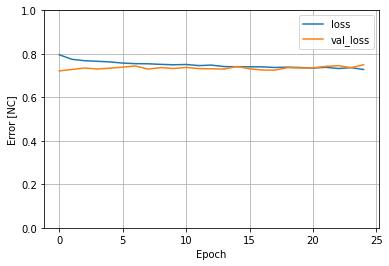

In [ ]:
plot_loss(history)

The fact that loss decreases consistently while val loss increases as time goes by shows evidence of overtraining. This evidence lead to the decision of decreasing the val loss to 25 epochs. 
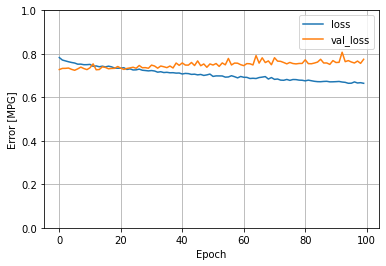

18/18 [==============================] - 0s 2ms/step


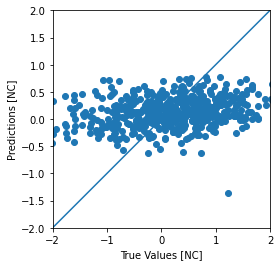

In [ ]:
test_predictions = dnn_model_1.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [-2, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Final Model

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [NUM_COLLISIONS]']).T


,Mean absolute error [NUM_COLLISIONS]
LM_model_main,0.816015
LM_model_moday,0.836503
LM_model_all,0.810305
dnn_model_1,0.803938
dnn_model_moday,0.658595
dnn_model_all,0.794769


As can be seen comparing the mean absolute error for all models only dnn_model_moday seems to offer the highest performance, though due to the randomisation the results seem to differ every time. 

**ANALYSIS OF EACH MODEL**

Reminder that range of values in the NC standardised only dataset is 2.5 to -2.6 so the mean error should be thought of as relative to this range. Compared to a 0 to 1 normalised dataset the range is 5 times less. Therefore the mean error should be considered around 5 times less as well.

LM DAY only

The Linear regressor using only the day variable was simply a test run, and didnt achieve any good results.


LM main

This was the model built using the weather variables selected from the first assignment. As can be seen it offers poor accuracy, but it shows no signs of overtraining. It is a disapointment that it turned out so poorly, but maybe some fine tuning or using a dataset with pre normalised features could increase the accuracy, though it would be hard to compare the two different scales of as the other datasets use the label normalised from 0 to 1 instead of scaling from around about

LM MO DAY 
This uses the same variables as LM_main but utilises the month and day as well, interestingly this achieves the worst accuracy out of all the models. However the history plot shows that this is most likely due to a minor spike as can be seen here.

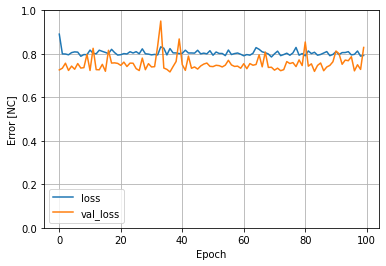

LM all weather variables.
This regressor used all weather variables, and although it achieved the best results out of all of the linear regressors it still delivered very poor accuracy. There were no signs of overtraining in the loss plot and there did not seem to be any extreme spikes in the last 10 epochs. 

DNN

DNN main was the DNN equivalent of LM main using the same variables, it also achieves the same results at a mean error of 0.803938, which although lower than the linear regressors is still not much of an improvement. This shows that the selected variables from assessment 1 might not be as useful as though.

DNN moday
this is the same DNN as above but with the addition of the month and day. It is this most accurate model produced, shows slight signs of potential overtraining as the loss overtakes the val_loss, and shows a line with a genuinely good fit as can be seen in the second graph below.

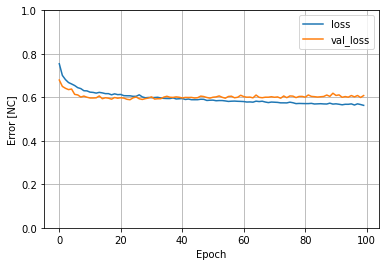

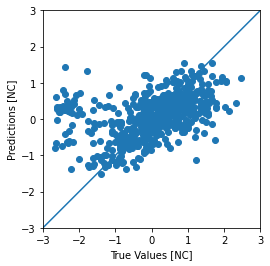

DNN all weather variables

This DNN uses all weather variables. and is now slightly more accurate than most other variables due to being cut off at 25 epochs before it could overtrain as shown in the loss graph comparision where the validation loss gets slightly higher as the training loss becomes much lower over the remaining 75 epochs. 
This is the only model where overfitting becomes a problem. In the other models there is no problem with overtraining. 
Its important to note that the DNN models have a much higher risk of overtraining than the linear regression models do.


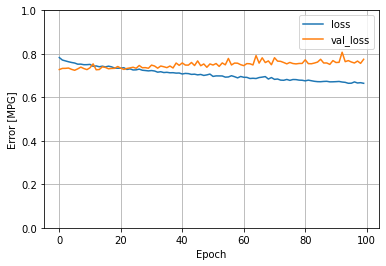

# Justification for approach



My main approach to this problem was to simply make sure the input neurons were enough to give a good result, but not so many to cause overfitting like what happened with the dnn all variables model. I also used two layers of 48 neurons each as per the advice of towardsdatascience (2019) to use 2-5 hidden layers and about a 100 neurons. There is only one output neuron and i have decided to use Rectified Linear Unit as the activation function as it does not activate all the neurons at the same time which makes it more conputationally efficient compared to the sigmoid and tanh functions (analyticsvidhya, 2020).

# In conclusion
The final model will be the tensorflow "month", "day", "max","temp", "min", "wdsp" and "prcp" model as despite it using month and day making it slightly off topic it is also the most accurate and the best at identifying potentially more dangerous days in which the new york emergency services should be at high alert. It did show some signs of potentially overfitting with more training but it did not seem to have a significant impact on the validation performance. 




# Bibliography

towards data science (2019) designing your neural networks [online] https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed (accessed 01/04/2023)

Analytics vidhya (2020) Fundamentals of Deep Learning – Activation Functions and When to Use Them? [online] https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/#:~:text=The%20ReLU%20function%20is%20another,neurons%20at%20the%20same%20time. (accessed 01/04/2023)